In [189]:
# EDA for GSAi Chat Data 4/3-4/7
# Ask: How do the tags seem to work right now (e.g., any missing? how many per prompt? do they change a lot between prompts in a given session?)
# How much do the tags converge or not (e.g., how many tags in total? are there any clear patterns?)
# Author: Kai Cobb
# Date: April 9, 2025

In [190]:
#############################
# Import necessary packages #
#############################

In [191]:

import pandas as pd
import numpy as np
import nltk
import ast 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
nltk.download("punkt")





# Download NLTK stopwords if not already available
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     D:\Users\kaiecobb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     D:\Users\kaiecobb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [192]:
#################
# Load the Data #
#################

In [193]:
df = pd.read_csv(r"D:\Users\kaiecobb\Documents\GitHub\NLP4Survey\Customer-Data-Survey-Analysis\Notebooks\EDA for GSAi\gsai_chats_4_3-4_7_2025.csv")

In [194]:
##################################################
# Checking the Dataset Structure & Data Cleaning #
##################################################

In [195]:
# Display first few rows to inspect column names
print(df.head())

                                user_id                       conversation_id  \
0  31447765-a06b-4cb7-b43b-e989141821c9  cbcc89b4-c20a-429f-a154-3fb08751f3a1   
1  31447765-a06b-4cb7-b43b-e989141821c9  cbcc89b4-c20a-429f-a154-3fb08751f3a1   
2  20d5ce9d-3f50-447c-bec8-23e42571441b  40e199da-6188-4a0a-85c4-a060bf7063b4   
3  20d5ce9d-3f50-447c-bec8-23e42571441b  40e199da-6188-4a0a-85c4-a060bf7063b4   
4  20d5ce9d-3f50-447c-bec8-23e42571441b  40e199da-6188-4a0a-85c4-a060bf7063b4   

  conversation_created                            message_id  \
0  2025-04-03 04:16:02  c67812bb-0c73-4ee8-a92d-c67052700c76   
1  2025-04-03 04:16:02  ac442509-0984-44ac-9cdb-ea0948b415f0   
2  2025-04-03 05:36:17  3b1157d0-d4e4-4674-91c6-12d31c08ef2f   
3  2025-04-03 05:36:17  fd7cbdf5-8252-410b-ba71-0e29627c9bcf   
4  2025-04-03 05:36:17  1cf0fc2e-b733-483b-8c60-879df88aae24   

                              parent_id       role            timestamp  \
0                                   NaN       user  2

In [196]:
#Check for missing values
print(df.isnull().sum())

user_id                     0
conversation_id             0
conversation_created        0
message_id                  1
parent_id                1524
role                        1
timestamp                  86
content                    20
tags                      177
feedback_rating         10401
feedback_comment        10506
feedback_reason         10467
feedback_rrating        10468
regenerated                 0
model_name               5255
dtype: int64


In [197]:
# Overview of dataset 
print(df.info()) # Check column types and missing values
print(df.describe()) # Summary Statistics

#Preview first few rows
df.head()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10524 entries, 0 to 10523
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               10524 non-null  object 
 1   conversation_id       10524 non-null  object 
 2   conversation_created  10524 non-null  object 
 3   message_id            10523 non-null  object 
 4   parent_id             9000 non-null   object 
 5   role                  10523 non-null  object 
 6   timestamp             10438 non-null  object 
 7   content               10504 non-null  object 
 8   tags                  10347 non-null  object 
 9   feedback_rating       123 non-null    float64
 10  feedback_comment      18 non-null     object 
 11  feedback_reason       57 non-null     object 
 12  feedback_rrating      56 non-null     float64
 13  regenerated           10524 non-null  bool   
 14  model_name            5269 non-null   object 
dtypes: bool(1), float64

,user_id,conversation_id,conversation_created,message_id,parent_id,role,timestamp,content,tags,feedback_rating,feedback_comment,feedback_reason,feedback_rrating,regenerated,model_name
0,31447765-a06b-4cb7-b43b-e989141821c9,cbcc89b4-c20a-429f-a154-3fb08751f3a1,2025-04-03 04:16:02,c67812bb-0c73-4ee8-a92d-c67052700c76,NaN,user,2025-04-03 04:16:02,Which SINs is GSA removing from the MAS program?,"[""business"", ""government"", ""procurement""]",NaN,NaN,NaN,NaN,False,NaN
1,31447765-a06b-4cb7-b43b-e989141821c9,cbcc89b4-c20a-429f-a154-3fb08751f3a1,2025-04-03 04:16:02,ac442509-0984-44ac-9cdb-ea0948b415f0,c67812bb-0c73-4ee8-a92d-c67052700c76,assistant,2025-04-03 04:16:03,"I apologize, but I do not have specific, curre...","[""business"", ""government"", ""procurement""]",NaN,NaN,NaN,NaN,False,Claude Haiku 3.5
2,20d5ce9d-3f50-447c-bec8-23e42571441b,40e199da-6188-4a0a-85c4-a060bf7063b4,2025-04-03 05:36:17,3b1157d0-d4e4-4674-91c6-12d31c08ef2f,NaN,user,2025-04-03 05:36:15,Sharkey’s technical proposal and management pr...,"[""information_technology"", ""government_contrac...",NaN,NaN,NaN,NaN,False,NaN
3,20d5ce9d-3f50-447c-bec8-23e42571441b,40e199da-6188-4a0a-85c4-a060bf7063b4,2025-04-03 05:36:17,fd7cbdf5-8252-410b-ba71-0e29627c9bcf,3b1157d0-d4e4-4674-91c6-12d31c08ef2f,assistant,2025-04-03 05:36:19,"Based on the documents, here are the key highl...","[""information_technology"", ""government_contrac...",NaN,NaN,NaN,NaN,False,Claude Haiku 3.5
4,20d5ce9d-3f50-447c-bec8-23e42571441b,40e199da-6188-4a0a-85c4-a060bf7063b4,2025-04-03 05:36:17,1cf0fc2e-b733-483b-8c60-879df88aae24,fd7cbdf5-8252-410b-ba71-0e29627c9bcf,user,2025-04-03 05:36:59,1. Government Obligations: _(list the gover...,"[""information_technology"", ""government_contrac...",NaN,NaN,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10519,25b67547-0c93-45d9-b738-5b0134f2352e,4d9c2020-cfb9-4f72-8465-41e69f8c016f,2025-04-07 09:56:54,234c1d25-12df-4250-a0be-664a499e0407,68961364-5d26-413d-9e3e-4a4b2d4bd0bb,assistant,2025-04-07 09:56:54,"I apologize, but I am not able to generate, cr...","[""engineering"", ""document_design"", ""business""]",NaN,NaN,NaN,NaN,False,Claude Sonnet 3.5 v2
10520,cca6eb8d-26fc-4c09-8c48-00c07af05b31,4753c4e7-eb34-4370-9234-b6f5cb5a8c4d,2025-04-07 09:57:04,e96ddde5-36e9-4149-9c12-414e8ffd7e0e,NaN,user,2025-04-07 09:57:04,· During March the asbestos pipe wrap wa...,"[""facility_maintenance"", ""construction_managem...",NaN,NaN,NaN,NaN,False,NaN
10521,cca6eb8d-26fc-4c09-8c48-00c07af05b31,4753c4e7-eb34-4370-9234-b6f5cb5a8c4d,2025-04-07 09:57:04,ca1cdb80-1cd5-455e-8eaf-da3bdd3fff53,e96ddde5-36e9-4149-9c12-414e8ffd7e0e,assistant,2025-04-07 09:57:04,I want to be clear that I cannot speak to spec...,"[""facility_maintenance"", ""construction_managem...",NaN,NaN,NaN,NaN,False,Claude Haiku 3.5
10522,25b67547-0c93-45d9-b738-5b0134f2352e,0db0afe4-9fa3-46dc-8781-296ec988799f,2025-04-07 09:57:34,01f72f83-c4ea-4f1a-9a5f-5a70bdf62207,NaN,user,2025-04-07 09:57:34,I’m creating a cover sheet for a professional ...,NaN,NaN,NaN,NaN,NaN,False,NaN


In [198]:
# Drop null rows for 'content'
df = df.dropna(subset=['content'])

In [199]:
#Check for missing values
print(df.isnull().sum())

user_id                     0
conversation_id             0
conversation_created        0
message_id                  1
parent_id                1522
role                        1
timestamp                  85
content                     0
tags                      171
feedback_rating         10381
feedback_comment        10486
feedback_reason         10447
feedback_rrating        10448
regenerated                 0
model_name               5253
dtype: int64


In [200]:
# Convert timestamp to datetime if not already
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Convert Tags from string to list
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else[])

D:\Users\kaiecobb\AppData\Local\Temp\1\ipykernel_20996\1457942459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
D:\Users\kaiecobb\AppData\Local\Temp\1\ipykernel_20996\1457942459.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else[])


In [201]:
df

,user_id,conversation_id,conversation_created,message_id,parent_id,role,timestamp,content,tags,feedback_rating,feedback_comment,feedback_reason,feedback_rrating,regenerated,model_name
0,31447765-a06b-4cb7-b43b-e989141821c9,cbcc89b4-c20a-429f-a154-3fb08751f3a1,2025-04-03 04:16:02,c67812bb-0c73-4ee8-a92d-c67052700c76,NaN,user,2025-04-03 04:16:02,Which SINs is GSA removing from the MAS program?,"[business, government, procurement]",NaN,NaN,NaN,NaN,False,NaN
1,31447765-a06b-4cb7-b43b-e989141821c9,cbcc89b4-c20a-429f-a154-3fb08751f3a1,2025-04-03 04:16:02,ac442509-0984-44ac-9cdb-ea0948b415f0,c67812bb-0c73-4ee8-a92d-c67052700c76,assistant,2025-04-03 04:16:03,"I apologize, but I do not have specific, curre...","[business, government, procurement]",NaN,NaN,NaN,NaN,False,Claude Haiku 3.5
2,20d5ce9d-3f50-447c-bec8-23e42571441b,40e199da-6188-4a0a-85c4-a060bf7063b4,2025-04-03 05:36:17,3b1157d0-d4e4-4674-91c6-12d31c08ef2f,NaN,user,2025-04-03 05:36:15,Sharkey’s technical proposal and management pr...,"[information_technology, government_contractin...",NaN,NaN,NaN,NaN,False,NaN
3,20d5ce9d-3f50-447c-bec8-23e42571441b,40e199da-6188-4a0a-85c4-a060bf7063b4,2025-04-03 05:36:17,fd7cbdf5-8252-410b-ba71-0e29627c9bcf,3b1157d0-d4e4-4674-91c6-12d31c08ef2f,assistant,2025-04-03 05:36:19,"Based on the documents, here are the key highl...","[information_technology, government_contractin...",NaN,NaN,NaN,NaN,False,Claude Haiku 3.5
4,20d5ce9d-3f50-447c-bec8-23e42571441b,40e199da-6188-4a0a-85c4-a060bf7063b4,2025-04-03 05:36:17,1cf0fc2e-b733-483b-8c60-879df88aae24,fd7cbdf5-8252-410b-ba71-0e29627c9bcf,user,2025-04-03 05:36:59,1. Government Obligations: _(list the gover...,"[information_technology, government_contractin...",NaN,NaN,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10519,25b67547-0c93-45d9-b738-5b0134f2352e,4d9c2020-cfb9-4f72-8465-41e69f8c016f,2025-04-07 09:56:54,234c1d25-12df-4250-a0be-664a499e0407,68961364-5d26-413d-9e3e-4a4b2d4bd0bb,assistant,2025-04-07 09:56:54,"I apologize, but I am not able to generate, cr...","[engineering, document_design, business]",NaN,NaN,NaN,NaN,False,Claude Sonnet 3.5 v2
10520,cca6eb8d-26fc-4c09-8c48-00c07af05b31,4753c4e7-eb34-4370-9234-b6f5cb5a8c4d,2025-04-07 09:57:04,e96ddde5-36e9-4149-9c12-414e8ffd7e0e,NaN,user,2025-04-07 09:57:04,· During March the asbestos pipe wrap wa...,"[facility_maintenance, construction_management...",NaN,NaN,NaN,NaN,False,NaN
10521,cca6eb8d-26fc-4c09-8c48-00c07af05b31,4753c4e7-eb34-4370-9234-b6f5cb5a8c4d,2025-04-07 09:57:04,ca1cdb80-1cd5-455e-8eaf-da3bdd3fff53,e96ddde5-36e9-4149-9c12-414e8ffd7e0e,assistant,2025-04-07 09:57:04,I want to be clear that I cannot speak to spec...,"[facility_maintenance, construction_management...",NaN,NaN,NaN,NaN,False,Claude Haiku 3.5
10522,25b67547-0c93-45d9-b738-5b0134f2352e,0db0afe4-9fa3-46dc-8781-296ec988799f,2025-04-07 09:57:34,01f72f83-c4ea-4f1a-9a5f-5a70bdf62207,NaN,user,2025-04-07 09:57:34,I’m creating a cover sheet for a professional ...,[],NaN,NaN,NaN,NaN,False,NaN


In [202]:
####################
# Overview of Tags #
####################

In [203]:
# Percentage of tags
df['has_tags'] = df['tags'].apply(lambda x: len(x) > 0)
tags_summary = df['has_tags'].value_counts(normalize=True)
print("Percentage of prompts with tags:\n", tags_summary)

Percentage of prompts with tags:
 has_tags
True     0.98372
False    0.01628
Name: proportion, dtype: float64


D:\Users\kaiecobb\AppData\Local\Temp\1\ipykernel_20996\4009591603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_tags'] = df['tags'].apply(lambda x: len(x) > 0)


D:\Users\kaiecobb\AppData\Local\Temp\1\ipykernel_20996\3990273514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_tags'] = df['tags'].apply(len)


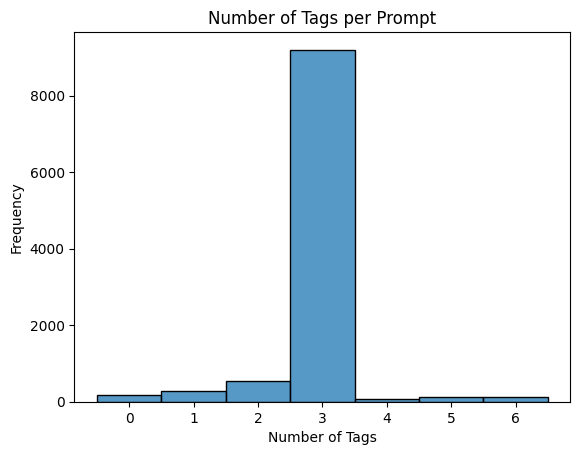

In [204]:
# Number of Tags per Prompt
df['num_tags'] = df['tags'].apply(len)

# Distribution of number of tags
sns.histplot(df['num_tags'], bins=range(0, df['num_tags'].max()+1), discrete=True)
plt.title("Number of Tags per Prompt")
plt.xlabel("Number of Tags")
plt.ylabel("Frequency")
plt.show()

In [205]:
# Missing Tags
missing_tags = df[df['tags'].apply(lambda x: len(x) == 0)]
print("Prompts with missing tags:\n", missing_tags[['user_id', 'conversation_id', 'content']].head())

Prompts with missing tags:
                                   user_id  \
220  2bbe25b7-d68e-460b-861d-06811409f575   
443  163ba112-4258-47ca-9b31-b2e2547ae355   
444  163ba112-4258-47ca-9b31-b2e2547ae355   
445  163ba112-4258-47ca-9b31-b2e2547ae355   
446  163ba112-4258-47ca-9b31-b2e2547ae355   

                          conversation_id  \
220  95db772d-13df-4bd0-a062-9b7c9d6307be   
443  b8547bc4-c1e2-4849-a7a7-4e96be908ea5   
444  b8547bc4-c1e2-4849-a7a7-4e96be908ea5   
445  b8547bc4-c1e2-4849-a7a7-4e96be908ea5   
446  b8547bc4-c1e2-4849-a7a7-4e96be908ea5   

                                               content  
220  Can you help describe the joins and important ...  
443  What region is selected?  \nSELECT qryProjects...  
444  Based on the SQL query, it appears the region ...  
445                             I want regions 4 and 5  
446  To select regions 4 and 5, you would modify th...  


In [206]:
missing_tags

,user_id,conversation_id,conversation_created,message_id,parent_id,role,timestamp,content,tags,feedback_rating,feedback_comment,feedback_reason,feedback_rrating,regenerated,model_name,has_tags,num_tags
220,2bbe25b7-d68e-460b-861d-06811409f575,95db772d-13df-4bd0-a062-9b7c9d6307be,2025-04-03 07:50:54,8bb8a566-679a-41a1-9ec5-b9fc8f6c5514,NaN,user,2025-04-03 07:50:54,Can you help describe the joins and important ...,[],NaN,NaN,NaN,NaN,False,NaN,False,0
443,163ba112-4258-47ca-9b31-b2e2547ae355,b8547bc4-c1e2-4849-a7a7-4e96be908ea5,2025-04-03 08:28:01,13528a88-7f69-4ede-82b3-3fd9dde049fc,NaN,user,2025-04-03 08:28:00,What region is selected? \nSELECT qryProjects...,[],NaN,NaN,NaN,NaN,False,NaN,False,0
444,163ba112-4258-47ca-9b31-b2e2547ae355,b8547bc4-c1e2-4849-a7a7-4e96be908ea5,2025-04-03 08:28:01,365bbd1f-104a-4be9-ae9f-29d3d1e3da01,13528a88-7f69-4ede-82b3-3fd9dde049fc,assistant,2025-04-03 08:28:01,"Based on the SQL query, it appears the region ...",[],NaN,NaN,NaN,NaN,False,Claude Haiku 3.5,False,0
445,163ba112-4258-47ca-9b31-b2e2547ae355,b8547bc4-c1e2-4849-a7a7-4e96be908ea5,2025-04-03 08:28:01,39fcfd35-11ae-4ef9-99d9-d0251757c4ee,365bbd1f-104a-4be9-ae9f-29d3d1e3da01,user,2025-04-03 08:28:47,I want regions 4 and 5,[],NaN,NaN,NaN,NaN,False,NaN,False,0
446,163ba112-4258-47ca-9b31-b2e2547ae355,b8547bc4-c1e2-4849-a7a7-4e96be908ea5,2025-04-03 08:28:01,041205b3-93fa-4434-afd4-fc451aadb25d,39fcfd35-11ae-4ef9-99d9-d0251757c4ee,assistant,2025-04-03 08:28:47,"To select regions 4 and 5, you would modify th...",[],NaN,NaN,NaN,NaN,False,Claude Haiku 3.5,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,c40ad566-387d-4510-b294-52546b68b671,b070320c-ec74-472a-b5ad-9d9b96bcd03a,2025-04-07 07:16:56,bc1c43a8-c1d2-4f07-9b3d-4672ed6cd346,NaN,user,2025-04-07 07:16:56,Please summarize the following: DRIVING AI INN...,[],NaN,NaN,NaN,NaN,False,NaN,False,0
10346,6b0a6779-0bc0-4908-96e9-74eabbeaf1ac,6e3227fd-b62d-4936-980b-a12f18e72cae,2025-04-07 09:25:37,d1377d24-802e-46f2-a3ff-29777f52c7c7,NaN,user,2025-04-07 09:25:37,do you have an API,[],NaN,NaN,NaN,NaN,False,NaN,False,0
10347,6b0a6779-0bc0-4908-96e9-74eabbeaf1ac,6e3227fd-b62d-4936-980b-a12f18e72cae,2025-04-07 09:25:37,34414b30-73b6-4460-ae3d-fa72e8b661f1,d1377d24-802e-46f2-a3ff-29777f52c7c7,assistant,2025-04-07 09:25:38,"As an AI assistant served via GSAi, I don't pe...",[],NaN,NaN,NaN,NaN,False,Claude Haiku 3.5,False,0
10522,25b67547-0c93-45d9-b738-5b0134f2352e,0db0afe4-9fa3-46dc-8781-296ec988799f,2025-04-07 09:57:34,01f72f83-c4ea-4f1a-9a5f-5a70bdf62207,NaN,user,2025-04-07 09:57:34,I’m creating a cover sheet for a professional ...,[],NaN,NaN,NaN,NaN,False,NaN,False,0


In [207]:
##############################
# Tag Variation Among Convos #
##############################

D:\Users\kaiecobb\AppData\Local\Temp\1\ipykernel_20996\4292729081.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  session_variation = df.groupby('conversation_id').apply(tag_changes)


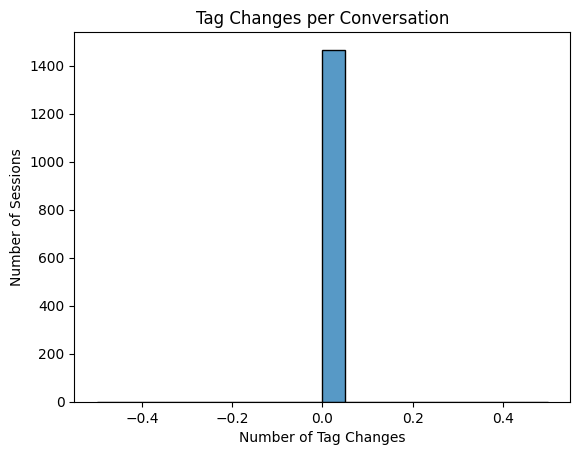

In [208]:
# Tag Change Frequency per Session

# Group by conversation and get tag lists
def tag_changes(group):
    group = group.sort_values('timestamp')
    tag_sets = group['tags'].tolist()
    changes = sum(tag_sets[i] != tag_sets[i+1] for i in range(len(tag_sets)-1))
    return pd.Series({'tag_changes': changes, 'num_turns': len(tag_sets)})

session_variation = df.groupby('conversation_id').apply(tag_changes)

# Visualization
sns.histplot(session_variation['tag_changes'], bins=20)
plt.title("Tag Changes per Conversation")
plt.xlabel("Number of Tag Changes")
plt.ylabel("Number of Sessions")
plt.show()

D:\Users\kaiecobb\AppData\Local\Temp\1\ipykernel_20996\162637945.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(regen_tags['num_tags'], label='regenerated', shade=True)
D:\Users\kaiecobb\AppData\Local\Temp\1\ipykernel_20996\162637945.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_regen_tags['num_tags'], label='non-regenerated', shade=True)


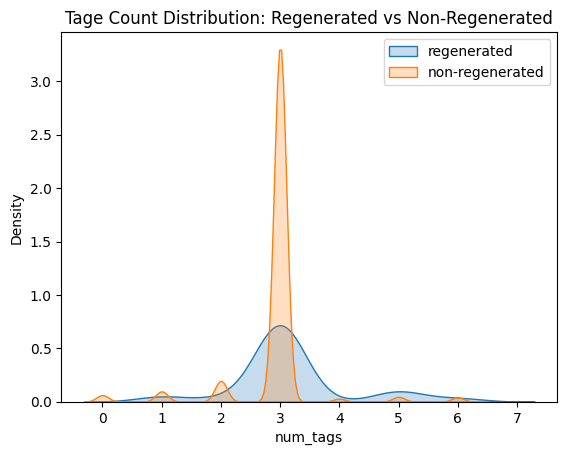

In [209]:
# Do regenerated messages have different tags
regen_tags = df[df['regenerated'] == True]
non_regen_tags = df[df['regenerated'] == False]

# Compare tag count distributions
sns.kdeplot(regen_tags['num_tags'], label='regenerated', shade=True)
sns.kdeplot(non_regen_tags['num_tags'], label='non-regenerated', shade=True)
plt.title("Tage Count Distribution: Regenerated vs Non-Regenerated")
plt.legend()
plt.show()

In [210]:
#################################
# Tag Diversity and Convergence #
#################################

In [211]:
# Unique Tags

# Flatten tag list
all_tags = [tag for tags in df['tags'] for tag in tags]
tag_counts = Counter(all_tags)

print("Total unique tags:", len(tag_counts))

Total unique tags: 524


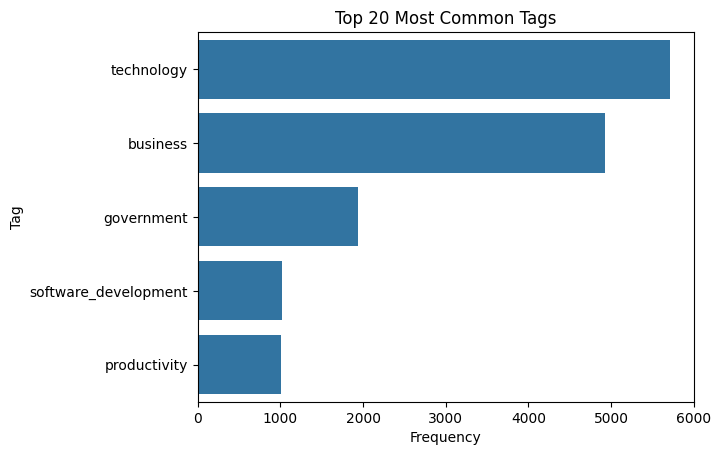

In [212]:
# Most Common Tags

common_tags = pd.DataFrame(tag_counts.most_common(5), columns=['Tag', 'Frequency'])

# Visualization
sns.barplot(data=common_tags, x='Frequency', y='Tag')
plt.title("Top 20 Most Common Tags")
plt.xlabel("Frequency")
plt.ylabel("Tag")
plt.show()


In [213]:
# Diversity Score of Tags
from scipy.stats import entropy

tag_freqs = np.array(list(tag_counts.values()))
tag_entropy = entropy(tag_freqs)
print(f"Entropy (diversity) of tags: {tag_entropy:.2f}")

Entropy (diversity) of tags: 3.92


D:\Users\kaiecobb\AppData\Local\Temp\1\ipykernel_20996\84874798.py:14: RuntimeWarning: Mean of empty slice
  return np.nanmean(similarities) if similarities else np.nan
D:\Users\kaiecobb\AppData\Local\Temp\1\ipykernel_20996\84874798.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  session_similarity = df.groupby('conversation_id').apply(session_jaccard)


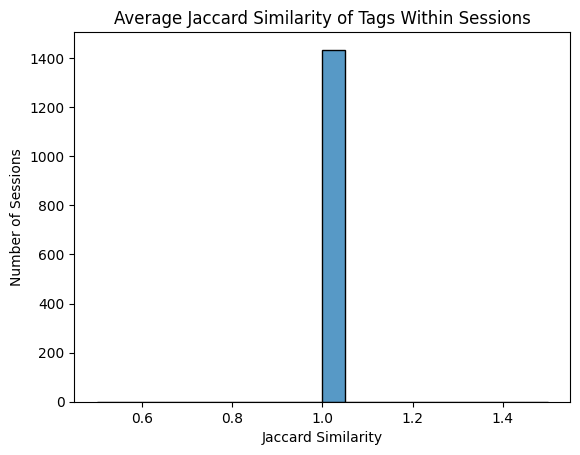

In [214]:
# Jaccard Similarity between tags in sessions
# Expect 1 for Jaccard similarity since # of topic changes is 0. Running to confirm
def jaccard_similarity(list1, list2): 
    set1, set2 = set(list1), set(list2)
    union = set1 | set2 
    if not union: # If the union is empty, we can't divide
        return np.nan # Or return 1.0 if you want to treat "empty = same"
    return len(set1 & set2) / len(union)

def session_jaccard(group):
    group = group.sort_values('timestamp')
    tag_sets = group['tags'].tolist()
    similarities = [jaccard_similarity(tag_sets[i], tag_sets[i+1]) for i in range(len(tag_sets)-1)]
    return np.nanmean(similarities) if similarities else np.nan

# Apply across sessions
session_similarity = df.groupby('conversation_id').apply(session_jaccard)

# Visualize
sns.histplot(session_similarity.dropna(), bins=20)
plt.title("Average Jaccard Similarity of Tags Within Sessions")
plt.xlabel("Jaccard Similarity")
plt.ylabel("Number of Sessions")
plt.show()

In [215]:
##############################
# Summary Stats and Insights # 
##############################

In [216]:
print("Average number of tags per prompt:", df['num_tags'].mean())
print("Median number of tags per session:", session_variation['tag_changes'].median())
print("Top 5 most common tags:\n", common_tags.head())

# More metrics
print("Average Jaccard Similarity within sessions:", session_similarity.mean())

Average number of tags per prompt: 2.912890327494288
Median number of tags per session: 0.0
Top 5 most common tags:
                     Tag  Frequency
0            technology       5715
1              business       4930
2            government       1938
3  software_development       1020
4          productivity       1007
Average Jaccard Similarity within sessions: 1.0


In [217]:
#####################
# Extended Analysis #
#####################

In [218]:
# Look at tag combinations
# Remove rows with missing or empty tags
df_tags = df[df['tags'].notnull() & df['tags'].apply(lambda x: len(x) > 0)]

# Sort each tag list alphabetically so ['business', 'technology'] and ['technology', 'business'] are treated the same
df_tags['TagCombination'] = df_tags['tags'].apply(lambda x: tuple(sorted(x)))
# Count the most common combinations
top_combinations = df_tags['TagCombination'].value_counts().head(5).reset_index()
top_combinations.columns = ['Tag Combination', 'Frequency']

# Display
print(top_combinations)

                            Tag Combination  Frequency
0       (business, government, procurement)        548
1  (productivity, spreadsheets, technology)        320
2      (business, productivity, technology)        290
3                                (general,)        270
4   (business, data_management, technology)        234


D:\Users\kaiecobb\AppData\Local\Temp\1\ipykernel_20996\1490712133.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tags['TagCombination'] = df_tags['tags'].apply(lambda x: tuple(sorted(x)))


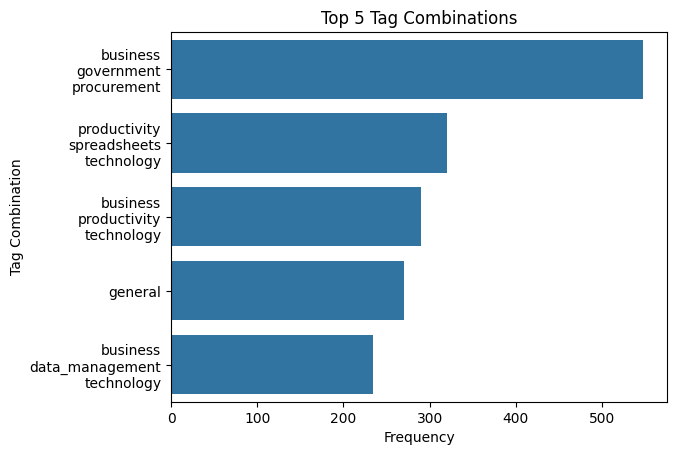

In [219]:


# Convert tuple to readable string for x-axis
top_combinations['Tag Combination'] = top_combinations['Tag Combination'].apply(lambda x: '\n'.join(x))

# Plot
sns.barplot(data=top_combinations, x='Frequency', y='Tag Combination')
plt.xlabel("Frequency")
plt.ylabel('Tag Combination')
plt.title("Top 5 Tag Combinations")
plt.show()